In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import altair as alt

In [2]:
# Load the data from the UN FAO DAD-IS DB
# Domestic Animal Diversity Information System (DAD-IS)
dad_is_df = pd.read_csv('../data/102821_FAO_DAD-IS_export.csv')

for c in dad_is_df.columns:
    print("'{0}',".format(c))

'Country',
'ISO3',
'Specie',
'Breed/Most common name',
'Description Of Specific Uses',
'Lang',
'Description',
'Transboundary name',
'Other name',
'Uses',
'Additional information',
'Additional information comments',
'Efabis cultural role comment',
'Efabis cultural value',
'Adaptability to specific environment',
'Specific resistance or tolerance',
'Specific reproductive characteristic',
'Special characteristic of product',
'Other special qualities',
'Reference for special qualities',
'Efabis genetic features',
'Efabis environmental role',
'Efabis adaptability to marginal land',
'Body conformation',
'Coat description',
'Coat quality',
'Comb type',
'Skin colour',
'Shank and foot colour',
'Plumage colour',
'Pattern within feather',
'Avian classification',
'Color comments',
'Efabis main colour',
'Efabis skin colour',
'Number of horns males',
'Number of horns females',
'Horn shape size and comments',
'Wither height males',
'Wither height females',
'Weight males',
'Weight females',
'Other spec

In [3]:
# Drop everything that is missing data in all columns of interest. 
cols_of_interest = ['Weight males', 'Weight females', 'Birth weight males', 'Birth weight females',
                    'Age maturity males', 'Age maturity females', 'Age breeding males', 'Age breeding females',
                    'Age first parturition AVG', 'Age first parturition MIN', 'Age first parturition MAX',
                    'Parturition interval AVG', 'Parturition interval MIN', 'Parturition interval MAX',
                    'Length productive life', 'Daily gain', 'Carcass weight', 'Dressing percentage',
                    'Litter size AVG', 'Litter size MIN', 'Litter size MAX']

dad_is_df = dad_is_df.dropna(axis=0, how='all', subset=cols_of_interest)
dad_is_df.shape

(5545, 111)

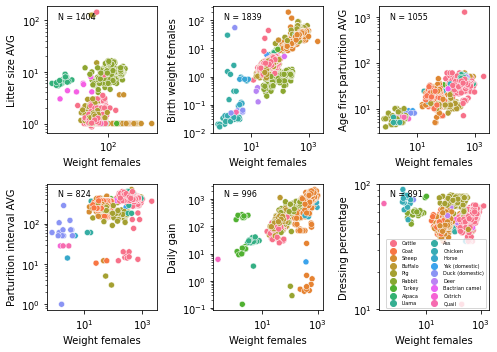

In [4]:
fig, axs = plt.subplots(figsize=(7,5), ncols=3, nrows=2)
flat_axs = axs.flatten()

cols2plot = ['Litter size AVG', 'Birth weight females', 'Age first parturition AVG',
             'Parturition interval AVG', 'Daily gain', 'Dressing percentage',
             ]

for my_ax, c in zip(flat_axs, cols2plot):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(dad_is_df['Weight females'] > 0, dad_is_df[c] > 0)
    sub_df = dad_is_df[mask]
    plt.text(0.1, 0.9, 'N = {0}'.format(sub_df.shape[0]), transform=my_ax.transAxes,
             fontsize=8)
    sns.scatterplot(data=sub_df, x='Weight females', y=c, hue='Specie')
    plt.legend().set_visible(False)
    
plt.legend(ncol=2, loc=4, fontsize=5).set_visible(True)
plt.tight_layout()
plt.savefig('../figures/FAO_breed_data.png', dpi=600, facecolor='w')
plt.show()